In [18]:
from datetime import datetime, date, timedelta
!pip install energyquantified
from energyquantified import EnergyQuantified
import pandas as pd
import numpy as np

API_KEY = 'd937f0-0c827e-a8aeb2-cf80cd'

In [19]:
# Initialize client
eq = EnergyQuantified(api_key=API_KEY)

In [51]:
prices = pd.DataFrame()
for price in ['NP Price Spot EUR/MWh NordPool H Actual','NO1 Price Spot EUR/MWh NordPool H Actual','NO2 Price Spot EUR/MWh NordPool H Actual',
                    'NO3 Price Spot EUR/MWh NordPool H Actual','NO4 Price Spot EUR/MWh NordPool H Actual',
                    'NO5 Price Spot EUR/MWh NordPool H Actual','SE1 Price Spot EUR/MWh NordPool H Actual',
            'SE2 Price Spot EUR/MWh NordPool H Actual','SE3 Price Spot EUR/MWh NordPool H Actual',
            'SE4 Price Spot EUR/MWh NordPool H Actual','DK1 Price Spot EUR/MWh NordPool H Actual',
            'DK2 Price Spot EUR/MWh NordPool H Actual','FI Price Spot EUR/MWh NordPool H Actual']:
    price_curve = eq.metadata.curves(q=price)[0]
    timeseries = eq.timeseries.load(
        price_curve,
        begin=date(2016,1,1),
        end=date.today()
    )

    # Convert to Pandas data frame
    country_df = timeseries.to_dataframe()
    country_df.rename(columns = {price: price.split(" ")[0]}, inplace = True)
    country_df.index = pd.to_datetime(country_df.index)
    if prices.empty:
        prices = country_df
    else:
        prices = pd.concat([prices, country_df], axis = 1, ignore_index = False)
prices

,NP,NO1,NO2,NO3,NO4,NO5,SE1,SE2,SE3,SE4,DK1,DK2,FI
,,,,,,,,,,,,,
,,,,,,,,,,,,,
date,,,,,,,,,,,,,
2016-01-01 00:00:00+01:00,16.39,16.39,16.39,16.39,16.39,16.39,16.39,16.39,16.39,16.39,16.39,16.39,16.39
2016-01-01 01:00:00+01:00,16.04,16.04,16.04,16.04,16.04,16.04,16.04,16.04,16.04,16.04,16.04,16.04,16.04
2016-01-01 02:00:00+01:00,15.74,15.74,15.74,15.74,15.74,15.74,15.74,15.74,15.74,15.74,15.74,15.74,15.74
2016-01-01 03:00:00+01:00,15.57,15.57,15.57,15.57,15.57,15.57,15.57,15.57,15.57,15.57,15.57,15.57,15.57
2016-01-01 04:00:00+01:00,15.47,15.47,15.47,15.47,15.47,15.47,15.47,15.47,15.47,15.47,15.47,15.47,15.47
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-17 19:00:00+02:00,89.86,120.29,120.29,17.70,17.70,120.29,9.06,9.06,120.29,153.42,238.29,238.29,72.76


In [47]:
loads = pd.DataFrame()
for load in ['NO1 Consumption MWh/h H Actual',
        'NO2 Consumption MWh/h H Actual',
        'NO3 Consumption MWh/h H Actual',
        'NO4 Consumption MWh/h H Actual',
        'NO5 Consumption MWh/h H Actual',
        'SE1 Consumption MWh/h H Actual',
        'SE2 Consumption MWh/h H Actual',
        'SE3 Consumption MWh/h H Actual',
        'SE4 Consumption MWh/h H Actual',
        'DK1 Consumption MWh/h H Actual',
        'DK2 Consumption MWh/h H Actual',
        'FI Consumption MWh/h H Actual']:
    load_curve = eq.metadata.curves(q=load)[0]
    timeseries = eq.timeseries.load(
        load_curve,
        begin=date(2016,1,1),
        end=date.today()
    )

    # Convert to Pandas data frame
    country_df = timeseries.to_dataframe()
    country_df.rename(columns = {load: load.split(" ")[0]}, inplace = True)
    country_df.index = pd.to_datetime(country_df.index)
    if loads.empty:
        loads = country_df
    else:
        loads = pd.concat([loads, country_df], axis = 1, ignore_index = False)
loads

,NO1,NO2,NO3,NO4,NO5,SE1,SE2,SE3,SE4,DK1,DK2,FI
,,,,,,,,,,,,
,,,,,,,,,,,,
date,,,,,,,,,,,,
2016-01-01 00:00:00+01:00,4582,4043,2809,2133,1852,1095.0,1864.0,9882.0,2677.0,1958.93,1413.46,10005
2016-01-01 01:00:00+01:00,4482,4010,2766,2047,1824,1084.0,1841.0,9665.0,2579.0,1812.50,1330.52,9722
2016-01-01 02:00:00+01:00,4421,3930,2741,2070,1797,1068.0,1801.0,9451.0,2513.0,1736.92,1273.74,9599
2016-01-01 03:00:00+01:00,4335,3839,2718,2032,1783,1066.0,1786.0,9309.0,2462.0,1670.21,1218.87,9524
2016-01-01 04:00:00+01:00,4304,3833,2700,2041,1786,1077.0,1786.0,9220.0,2448.0,1633.22,1181.73,9601
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-17 19:00:00+02:00,4389,4391,3430,2169,2043,1276.0,1670.0,10315.0,2642.0,2639.00,1709.00,9682


In [48]:
monthly_loads = loads.loc[loads.index.month.isin([10,11,12,1,2,3])]
monthly_loads

,NO1,NO2,NO3,NO4,NO5,SE1,SE2,SE3,SE4,DK1,DK2,FI
,,,,,,,,,,,,
,,,,,,,,,,,,
date,,,,,,,,,,,,
2016-01-01 00:00:00+01:00,4582,4043,2809,2133,1852,1095.0,1864.0,9882.0,2677.0,1958.93,1413.46,10005
2016-01-01 01:00:00+01:00,4482,4010,2766,2047,1824,1084.0,1841.0,9665.0,2579.0,1812.50,1330.52,9722
2016-01-01 02:00:00+01:00,4421,3930,2741,2070,1797,1068.0,1801.0,9451.0,2513.0,1736.92,1273.74,9599
2016-01-01 03:00:00+01:00,4335,3839,2718,2032,1783,1066.0,1786.0,9309.0,2462.0,1670.21,1218.87,9524
2016-01-01 04:00:00+01:00,4304,3833,2700,2041,1786,1077.0,1786.0,9220.0,2448.0,1633.22,1181.73,9601
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-17 19:00:00+02:00,4389,4391,3430,2169,2043,1276.0,1670.0,10315.0,2642.0,2639.00,1709.00,9682


<AxesSubplot:xlabel='date,date'>

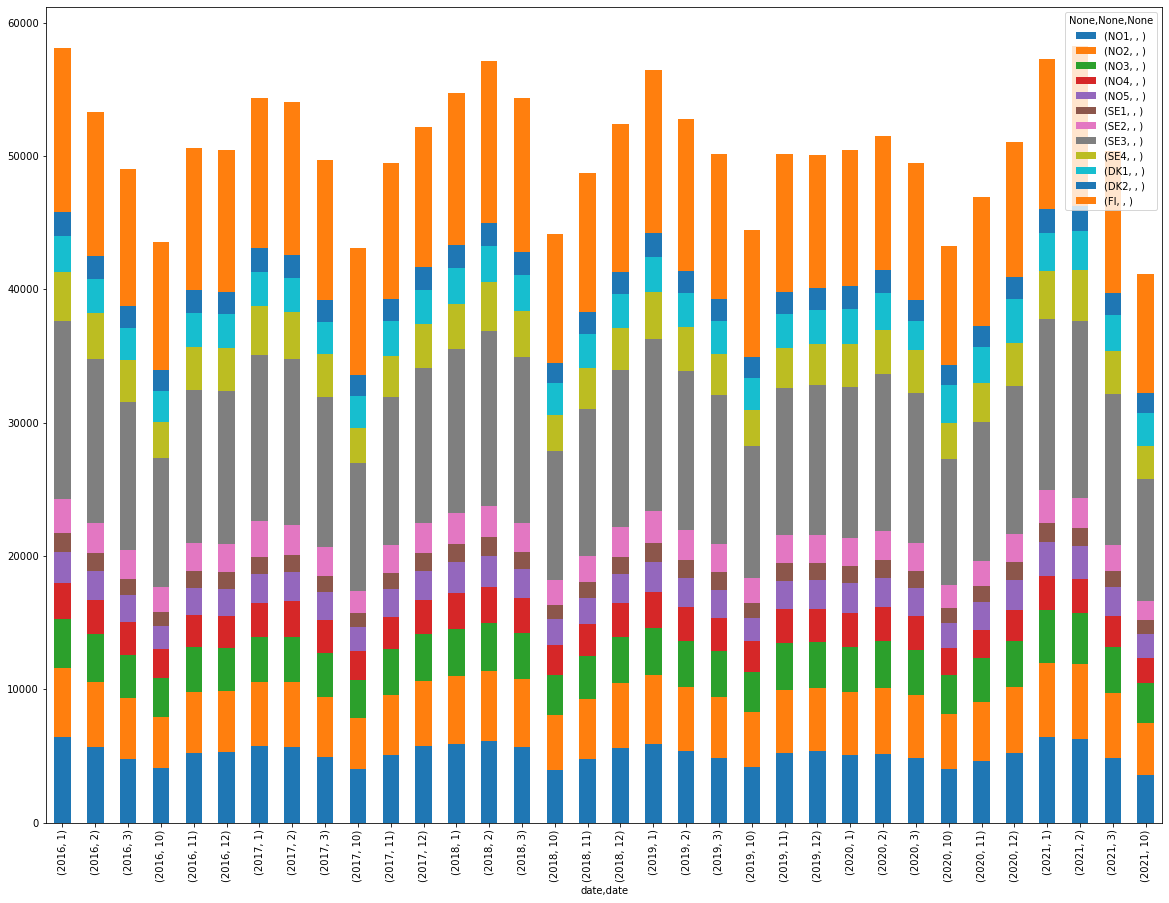

In [49]:
monthly_loads.groupby([monthly_loads.index.year, monthly_loads.index.month]).mean().\
    plot(kind = 'bar', stacked = True, figsize = (20, 15))

<AxesSubplot:xlabel='date'>

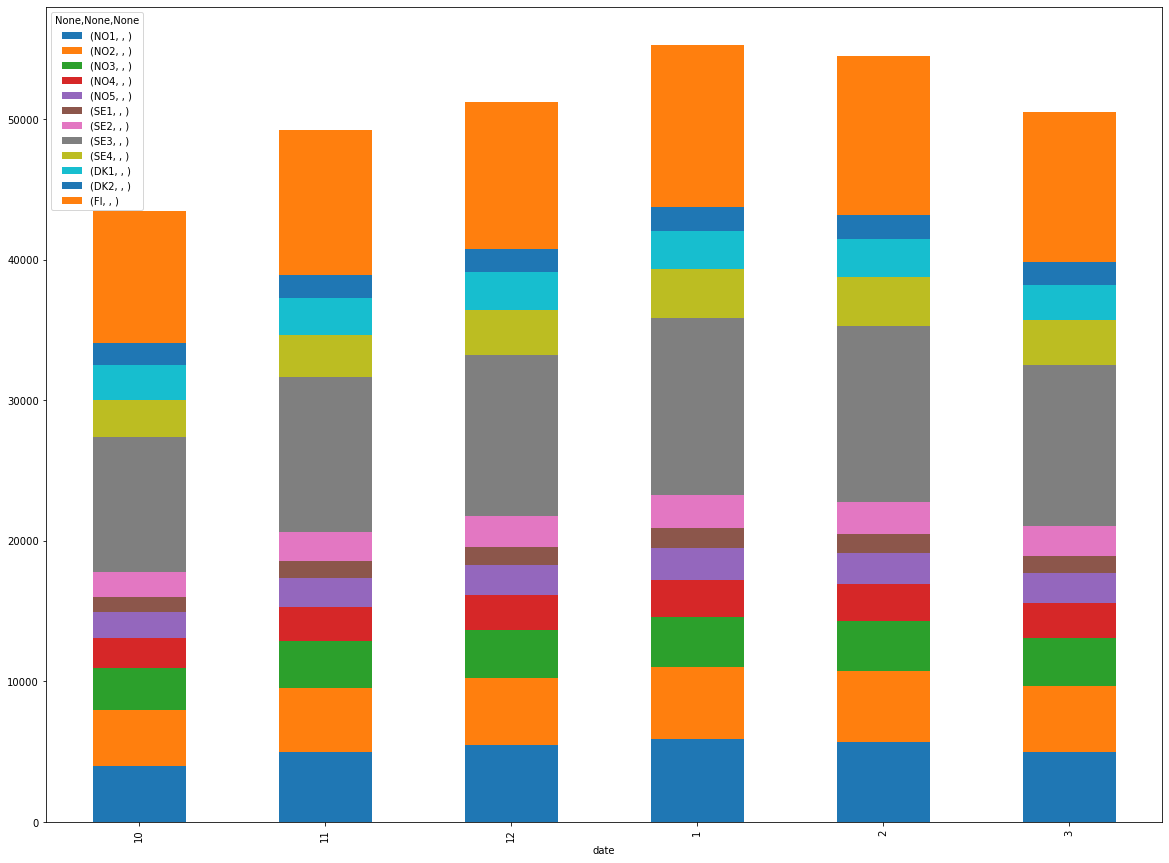

In [50]:
def custom_sort(x):
    return list(map(lambda y: y%10 if y>3 else y+10, x))

monthly_loads.groupby(monthly_loads.index.month).mean().sort_index(key = lambda x: custom_sort(x)).\
    plot(kind = 'bar', stacked = True, figsize = (20, 15))